In [1]:
# bu sayfamızda transaction veri seti üzerindeki zaman serisi analizlerini gerçekleştirdik.
import pandas as pd


In [2]:
# yükleme ve gözlem işlemleri
transactions =pd.read_csv ("transactions.csv")
df = transactions.copy()

In [3]:
len(df)

20831809

In [4]:
df.head()

,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity
0,146288072,2_50414543,2020082900,Product D,Facebook,1
1,146288071,2_50414542,2020082900,Product D,Organic search,1
2,146287503,2_50413935,2020082900,Product D,Organic search,1
3,146287504,2_50413936,2020082900,Product D,Organic search,1
4,146296436,3_65496155,2020082900,Product E,Google Ads,1


In [5]:
df.tail ()

,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity
20831804,226498706,11_2530064,2021101807,Product D,Google Ads,1
20831805,226498707,11_2530066,2021101807,Product D,Facebook,1
20831806,226498708,11_2530068,2021101807,Product D,Google Ads,1
20831807,226498709,11_2530070,2021101807,Product D,NaN,1
20831808,226498710,11_2530071,2021101807,Product D,Facebook,1


In [6]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20831809 entries, 0 to 20831808
Data columns (total 6 columns):
pk                  int64
ga_transactionid    object
ga_datehour         int64
ga_products         object
ga_channels         object
ga_itemquantity     int64
dtypes: int64(3), object(3)
memory usage: 953.6+ MB


In [7]:
df.dtypes

pk                   int64
ga_transactionid    object
ga_datehour          int64
ga_products         object
ga_channels         object
ga_itemquantity      int64
dtype: object

In [8]:
# "pk" değişkeni int64'dü ancak cateogry olması gerekirdi. diger objectler'de category yapıldı
df.pk = pd.Categorical (df.pk)
df.ga_transactionid = pd.Categorical (df.ga_transactionid)
df.ga_products = pd.Categorical (df.ga_products)
df.ga_channels = pd.Categorical (df.ga_channels)

In [9]:
df.dtypes

pk                  category
ga_transactionid    category
ga_datehour            int64
ga_products         category
ga_channels         category
ga_itemquantity        int64
dtype: object

In [10]:
#tarihler düzenlendi , saatler kaldırıldı
df['ga_datehour']=df['ga_datehour'] // 100

In [11]:
df['ga_datehour'] = pd.to_datetime(df['ga_datehour'], format='%Y%m%d')

In [12]:
df.head (5)

,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity
0,146288072,2_50414543,2020-08-29,Product D,Facebook,1
1,146288071,2_50414542,2020-08-29,Product D,Organic search,1
2,146287503,2_50413935,2020-08-29,Product D,Organic search,1
3,146287504,2_50413936,2020-08-29,Product D,Organic search,1
4,146296436,3_65496155,2020-08-29,Product E,Google Ads,1


In [13]:
df.tail ()

,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity
20831804,226498706,11_2530064,2021-10-18,Product D,Google Ads,1
20831805,226498707,11_2530066,2021-10-18,Product D,Facebook,1
20831806,226498708,11_2530068,2021-10-18,Product D,Google Ads,1
20831807,226498709,11_2530070,2021-10-18,Product D,NaN,1
20831808,226498710,11_2530071,2021-10-18,Product D,Facebook,1


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ga_itemquantity,20831809.0,1.000343,0.018537,1.0,1.0,1.0,1.0,4.0


In [15]:
df.isnull().sum()

pk                        0
ga_transactionid          0
ga_datehour               0
ga_products               0
ga_channels         2071467
ga_itemquantity           0
dtype: int64

In [16]:
len(df ["ga_channels"])

20831809

In [22]:
df=df[(df['ga_datehour'] >= '2020-08-01') & (df['ga_datehour'] < '2021-10-18')]

In [26]:
# daha anlamlı bir pivot table oluşturmak için month ve year gözlemleri ayrıştırıldı
df['date'] = pd.to_datetime(df['ga_datehour'],format='%Y%m%d')
df['year'] = pd.DatetimeIndex(df['ga_datehour']).year
df['month'] = pd.DatetimeIndex(df['ga_datehour']).month

In [28]:
# frame şeklinde düzenlenmiş bir pivot- table benzeri oluşturuldu, lead counts' lar derlendi
sumdf =df.groupby(['ga_channels','year',"month"],as_index=False).size().to_frame('size').reset_index()


In [30]:
sumdf

,ga_channels,year,month,size
0,CRM,2020,8,8305
1,CRM,2020,9,272386
2,CRM,2020,10,275386
3,CRM,2020,11,240604
4,CRM,2020,12,231659
...,...,...,...,...
85,Referral,2021,6,5926
86,Referral,2021,7,3359
87,Referral,2021,8,6134
88,Referral,2021,9,2686


In [31]:
# ileriki zamanlarda ml modeli için gerekli olabilir düşüncesiyle categorik olarak değiştirildi
df.year = pd.Categorical (df.year)
df.month = pd.Categorical (df.month)

In [32]:
# pivot table ile daha başarılı bir gözlem şansı yakaladık
import numpy as np
pd.pivot_table(df, values='ga_itemquantity', index=['ga_channels'], columns=['year',"month"], aggfunc=np.size)

year             2020                                    2021                  \
month              8       9       10      11      12      1       2       3    
ga_channels                                                                     
CRM              8305  272386  275386  240604  231659  173919  223929  253797   
Direct           1212   14014   12042   12969   13429   13950   18295   19827   
Facebook         7852   85545   85903   69146  143551  138608  130553  151012   
Google Ads      79957  925588  922332  836480  886535  784429  884020  927633   
Organic search  18724  196872  187848  192497  153202  121261  129747  120371   
Referral         1473   16932   13047   11492   12373    8737    9587    7309   

year                                                                    
month               4       5       6       7       8       9       10  
ga_channels                                                             
CRM             199836  207033  182853  176291  108267  131605   56477  
Direct           18799   18950   18773   20150   19428   23252   12522  
Facebook        179330  191791  141406  246592  150884  133976   74908  
Google Ads      841725  862360  813653  985252  886919  877830  501057  
Organic search   89497   75834   73884   97521   94596  101115   61330  
Referral          6096    5952    5926    3359    6134    2686    1463

In [45]:
# products içindeki sınıfların analizi için heat-map oluşturmak üzere pivot table hazırladık
pivotdf1 =pd.pivot_table(df, values='ga_itemquantity', index=["month","year"], columns=['ga_products'], aggfunc=np.size)

In [47]:
# lead channels içindeki sınıfların analizi için heat-map oluşturmak üzere pivot table hazırladık
pivotdf2 =pd.pivot_table(df, values='ga_itemquantity', index=["month","year"], columns=['ga_channels'], aggfunc=np.size)

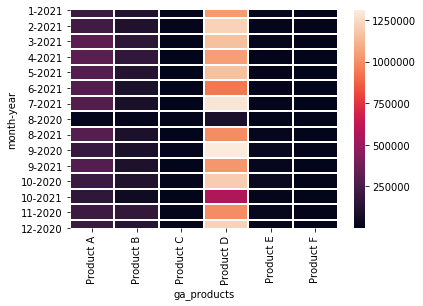

In [46]:
# şekilde görüldüğü üzere Product D üzerinde 7. ayda yoğunlaşma görülmüştür
import seaborn as sns
sns.heatmap (pivotdf1,linewidths =1);

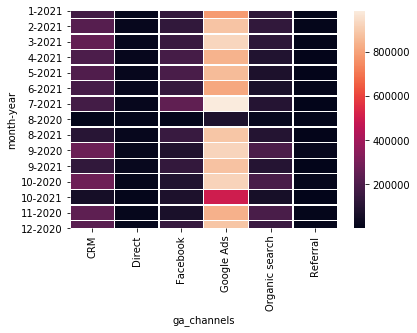

In [48]:
# şekilde görüldüğü üzere Google Ads kanalı üzeinden gelen lead'ler  7. ayda peak yapmıştır.
#demek oluyor ki Google Ads üzerinden gelen Product D'ye yönelik Lead'ler oluşan hacmin temelini oluşturmuştur.
# 8. ve 10 ay sözkonusu olunca hacim Google ads için de düşük , diğer tüm lead'ler yıl boyunca zayıftır.
sns.heatmap (pivotdf2, linewidths =.4);